<img src='222.jpg'>

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem.porter import PorterStemmer

from sklearn.svm import SVC
s=SVC()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
from nltk.tokenize import sent_tokenize

In [45]:
!pip install nltk

In [46]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [47]:
df=pd.read_csv("/kaggle/input/tinder-google-play-store-review/tinder_google_play_reviews.csv")

In [48]:
#Tokenize Cümledeki kelimeleri ayırmak ve Python listesi haline getirmek

In [49]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d6b6de04-70f7-4cf6-b79c-a32a1b3a433b,Vik S,https://play-lh.googleusercontent.com/a/ACg8oc...,Bugging out like crazy... Got blocked and logg...,1,0,NaN,2023-11-03 00:32:01,Thank you for sharing this. You can visit our ...,2023-11-03 00:37:21,NaN
1,3cbee64f-89ab-473c-9318-29b70b50f2fb,Brendan Carter,https://play-lh.googleusercontent.com/a-/ALV-U...,I still paid and it doesn't seem like anyone i...,1,0,14.20.0,2023-11-03 00:26:20,Thank you for sharing this experience with us....,2023-11-03 00:38:40,14.20.0
2,a92796c5-b971-4075-8b81-97007606e0cd,Juan,https://play-lh.googleusercontent.com/a/ACg8oc...,Apparently these people suck at sales! You hav...,1,0,14.20.0,2023-11-03 00:13:52,"At its core, Tinder is free. You can create a ...",2023-11-03 07:43:36,14.20.0
3,652e911d-0637-4f2a-855b-e6c3be20f2d5,Deborah Serwaah,https://play-lh.googleusercontent.com/a/ACg8oc...,I need MTN momo payment method to pay for my s...,5,0,14.20.0,2023-11-03 00:10:46,NaN,NaN,14.20.0
4,2282fce5-29b0-47ca-9adc-6ebe47132a14,John Borrito,https://play-lh.googleusercontent.com/a/ACg8oc...,I'll be getting a refund threw my bank by disp...,1,0,14.20.0,2023-11-02 23:50:08,We’re sorry to hear about this. If you need he...,2023-11-03 00:37:01,14.20.0


In [50]:
df.shape

(602763, 11)

In [51]:
# Stopwords ; anlamsız kelimeleri çıkarıyor

In [52]:
from wordcloud import WordCloud, STOPWORDS

In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from nltk.stem import PorterStemmer  #ekleri kaldırır

In [55]:
ps=PorterStemmer()

In [56]:
#TF/IDF turn frequency   / Inverse Document Frequency
#bir kelime hangi cülede kaç kez geçiyor/ bir kelime bir sayfada kaç kez geçiyor

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [58]:
df.isnull().sum()

reviewId                     0
userName                     5
userImage                    0
content                   1360
score                        0
thumbsUpCount                0
reviewCreatedVersion    124527
at                           0
replyContent            554464
repliedAt               554464
appVersion              124527
dtype: int64

In [59]:
#Sentiment Analizi - Pozoitf negatif nötr

In [25]:
df.head(30)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
1,3cbee64f-89ab-473c-9318-29b70b50f2fb,Brendan Carter,https://play-lh.googleusercontent.com/a-/ALV-U...,I still paid and it doesn't seem like anyone i...,1,0,14.20.0,2023-11-03 00:26:20,Thank you for sharing this experience with us....,2023-11-03 00:38:40,14.20.0
2,a92796c5-b971-4075-8b81-97007606e0cd,Juan,https://play-lh.googleusercontent.com/a/ACg8oc...,Apparently these people suck at sales! You hav...,1,0,14.20.0,2023-11-03 00:13:52,"At its core, Tinder is free. You can create a ...",2023-11-03 07:43:36,14.20.0
4,2282fce5-29b0-47ca-9adc-6ebe47132a14,John Borrito,https://play-lh.googleusercontent.com/a/ACg8oc...,I'll be getting a refund threw my bank by disp...,1,0,14.20.0,2023-11-02 23:50:08,We’re sorry to hear about this. If you need he...,2023-11-03 00:37:01,14.20.0
5,ece793b1-c02d-448e-ac1b-df80bdb32427,Ross2k,https://play-lh.googleusercontent.com/a-/ALV-U...,This app has been the genesis for some really ...,2,0,14.18.0,2023-11-02 23:39:17,Apologies for the inconvenience. If your probl...,2023-11-03 00:38:06,14.18.0
10,741d8647-c512-467e-a31f-39f7be5d1f78,McKenna Kelly,https://play-lh.googleusercontent.com/a-/ALV-U...,I have been trying to use tinder again n it sa...,1,0,14.9.0,2023-11-02 21:53:05,Thank you for your comment. We're sorry you di...,2023-11-02 22:10:33,14.9.0
11,15ded1f8-1b28-4f00-8bdb-45dc606ddeb4,Salem Moneer,https://play-lh.googleusercontent.com/a-/ALV-U...,worst app ever,1,0,14.18.0,2023-11-02 21:52:07,Thank you for your comment. We're sorry you di...,2023-11-02 22:10:38,14.18.0
12,4383dc75-8d11-4681-8c23-8047ed45b3ad,PAUL CHAPMAN,https://play-lh.googleusercontent.com/a/ACg8oc...,boring when you got to pay to see who likes you.,1,0,14.20.0,2023-11-02 21:50:36,Thank you for your comment. We're sorry you di...,2023-11-02 22:10:38,14.20.0
15,c5d1bbe3-be78-443c-bd36-dad0433d8bfd,Phillip M,https://play-lh.googleusercontent.com/a-/ALV-U...,Lol. 50 percent off gold and its still $20. Pr...,1,2,14.20.0,2023-11-02 21:37:32,Sorry to hear that! You can use Tinder for fre...,2023-11-03 00:37:10,14.20.0
16,16a70d31-56d3-4c76-ab20-55912f6f4728,Suga Sharod,https://play-lh.googleusercontent.com/a/ACg8oc...,pay to play,2,0,14.17.0,2023-11-02 21:36:19,Sorry to hear you feel this way. Here to remin...,2023-11-03 00:37:10,14.17.0
18,47ee97d7-7152-4881-bc79-a620a2aef64f,victor Bercian,https://play-lh.googleusercontent.com/a-/ALV-U...,"Garbage, full of sellers, bots, and the algori...",1,0,13.4.0,2023-11-02 21:13:56,Thanks for sharing your feedback. We want ever...,2023-11-02 22:08:18,13.4.0


In [60]:
df.shape

(602763, 11)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification algoritmasi
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

Bir NLP projesinde yapilmasi gerekenler
1- Hepsine kucuk harfe cevir
2- Rakamlari at
3- satir sonrlarini kaldir
4- Noktalama isaretlerini kaldir
5- Tokenize et
6- Ekleri kaldir koklerini bul
7- Stopwordsleri kaldir
8- N-gram iki kelime veya 3 vey N kelimeyi siyak sibak look for  look up Dondu donmedi

In [63]:
df['content']=df['content'].str.lower() #kucuk harfe cevir'
df['content']=df['content'].str.replace('[^\w\s]','') #noktalama isaretlerini kaldir 
df['content']=df['content'].str.replace('\d+','') # rakamlari yoket
df['content']=df['content'].str.replace('\n','').replace('\r','') # yeni satir ve entera basilan yerleri kaldirdik

In [97]:
def wc(data,bgcolor):    
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [98]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

In [104]:
df=df.dropna()

In [106]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
1,3cbee64f-89ab-473c-9318-29b70b50f2fb,Brendan Carter,https://play-lh.googleusercontent.com/a-/ALV-U...,i still paid and it doesn't seem like anyone i...,1,0,14.20.0,2023-11-03 00:26:20,Thank you for sharing this experience with us....,2023-11-03 00:38:40,14.20.0
2,a92796c5-b971-4075-8b81-97007606e0cd,Juan,https://play-lh.googleusercontent.com/a/ACg8oc...,apparently these people suck at sales! you hav...,1,0,14.20.0,2023-11-03 00:13:52,"At its core, Tinder is free. You can create a ...",2023-11-03 07:43:36,14.20.0
4,2282fce5-29b0-47ca-9adc-6ebe47132a14,John Borrito,https://play-lh.googleusercontent.com/a/ACg8oc...,i'll be getting a refund threw my bank by disp...,1,0,14.20.0,2023-11-02 23:50:08,We’re sorry to hear about this. If you need he...,2023-11-03 00:37:01,14.20.0
5,ece793b1-c02d-448e-ac1b-df80bdb32427,Ross2k,https://play-lh.googleusercontent.com/a-/ALV-U...,this app has been the genesis for some really ...,2,0,14.18.0,2023-11-02 23:39:17,Apologies for the inconvenience. If your probl...,2023-11-03 00:38:06,14.18.0
10,741d8647-c512-467e-a31f-39f7be5d1f78,McKenna Kelly,https://play-lh.googleusercontent.com/a-/ALV-U...,i have been trying to use tinder again n it sa...,1,0,14.9.0,2023-11-02 21:53:05,Thank you for your comment. We're sorry you di...,2023-11-02 22:10:33,14.9.0


In [107]:
df['score'].value_counts()

score
1    21038
3     6920
4     6644
2     5731
5     1166
Name: count, dtype: int64

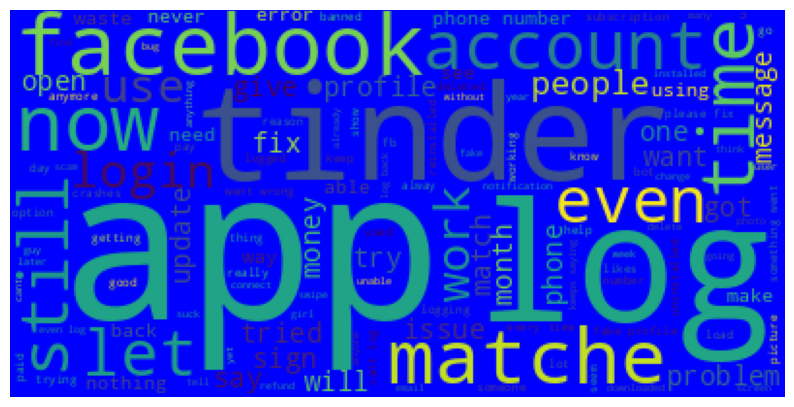

In [108]:
Text1=df.query("score==1")['content']
wc(Text1,'blue')

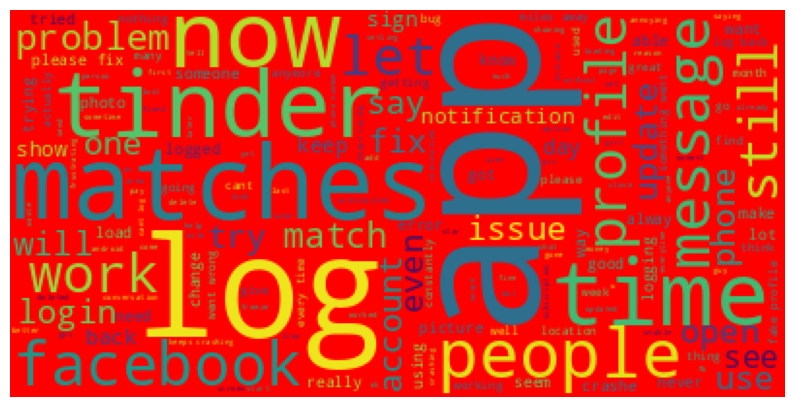

In [109]:
Text2=df.query("score==2")['content']
wc(Text2,'red')

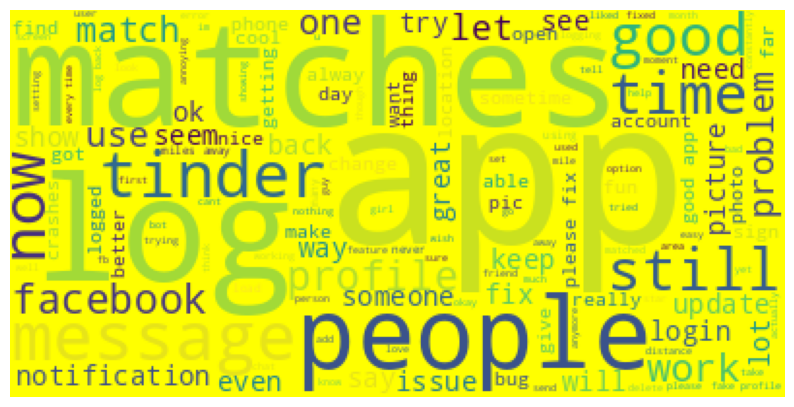

In [110]:
Text3=df.query("score==3")['content']
wc(Text3,'yellow')

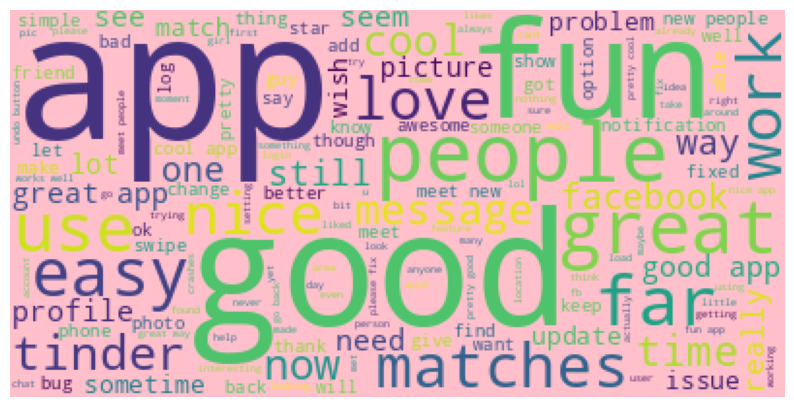

In [111]:
Text4=df.query("score==4")['content']
wc(Text4,'pink')

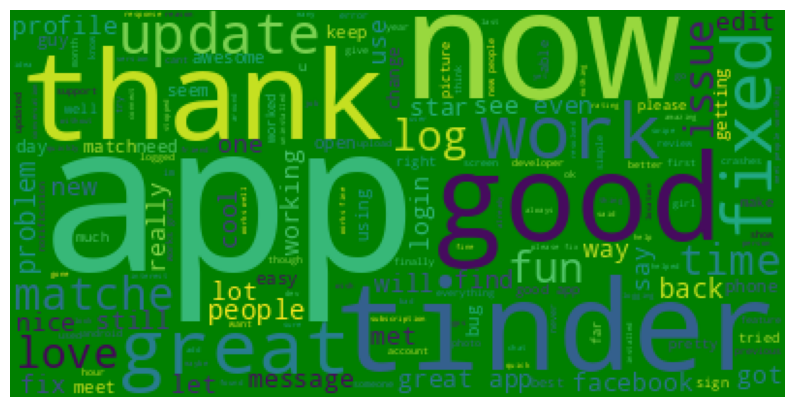

In [113]:
Text5=df.query("score==5")['content']
wc(Text5,'green')

In [114]:
x=df[['reviewId', 'userName', 'userImage',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion']]

y=df[['content', 'score']]

In [115]:
y.head()

,content,score
1,i still paid and it doesn't seem like anyone i...,1
2,apparently these people suck at sales! you hav...,1
4,i'll be getting a refund threw my bank by disp...,1
5,this app has been the genesis for some really ...,2
10,i have been trying to use tinder again n it sa...,1


<Axes: xlabel='score', ylabel='count'>

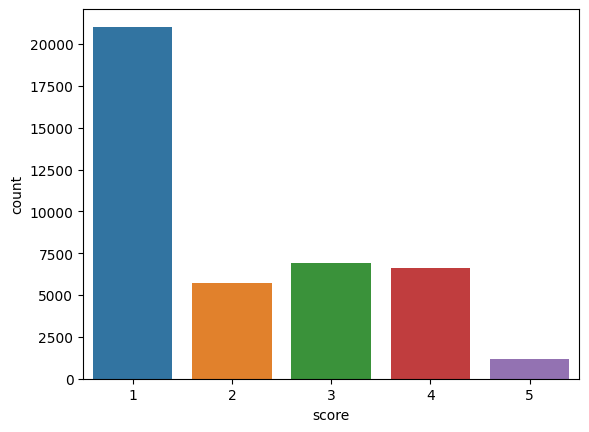

In [116]:
sns.countplot(x=df['score'])

In [117]:
y['score'].value_counts()

score
1    21038
3     6920
4     6644
2     5731
5     1166
Name: count, dtype: int64

In [118]:
iyivekotu=y[(y['score']==5)| (y['score']==1)]

In [119]:
iyivekotu.head(10)
#index aradan çıkanlardan dolayı bozulmuş oldu

,content,score
1,i still paid and it doesn't seem like anyone i...,1
2,apparently these people suck at sales! you hav...,1
4,i'll be getting a refund threw my bank by disp...,1
10,i have been trying to use tinder again n it sa...,1
11,worst app ever,1
12,boring when you got to pay to see who likes you.,1
15,lol. 50 percent off gold and its still $20. pr...,1
18,"garbage, full of sellers, bots, and the algori...",1
23,ok now there are adds in the lists that i keep...,1
26,i was banned or blocked no idea why and i cann...,1


In [120]:
iyivekotu.shape

(22204, 2)

In [121]:
iyivekotu.reset_index(drop=True,inplace=True)

#index i tekrar reset yapıp sıralayan kod

In [122]:
yes=iyivekotu[iyivekotu['score']=='5']['content'] 
no=iyivekotu[iyivekotu['score']=='1']['content']



In [123]:
from wordcloud import WordCloud

In [93]:
def wc(data,bgcolor):    
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

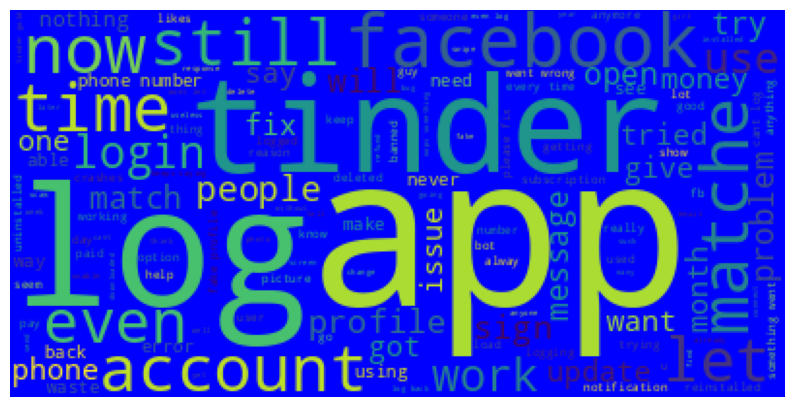

In [125]:
bulut=iyivekotu.query("score==1")['content']
wc(bulut,'blue')

In [128]:
x=iyivekotu["content"]
y=iyivekotu["score"]

In [129]:
x[0]

"i still paid and it doesn't seem like anyone is really on there because i've hardly talked to anybody. i get notifications of a like but find out it's a bust, a scam, a ruse..."

In [130]:
vect=CountVectorizer(ngram_range=(1,2),stop_words='english')

In [131]:
x=vect.fit_transform(x)

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [133]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names_out())

In [134]:
nb=MultinomialNB()

In [135]:
model=nb.fit(x_train,y_train)

In [136]:
pred=nb.predict(x_test)

In [137]:
accuracy_score(pred,y_test)

0.9389777077234857